### Assignment 10

Sai Baba Bheemishetty

US53017

Use the imdb-reviews_2.csv file.

• Load the data

• Count the number of positive and negative sentiment

• Clean the text ‘review’ and create a column called ‘review_processed’
• Replace short words as

df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))

• Make entire text lowercase

• Remove stopwords

• Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’

• Add to the list of words

• Lemmatize the text

• Convert NLTK tags into ‘wordnet’ tags

• Find the part of speech tag

• Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
each token

• Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
Else, use the tag to lemmatize the token

• Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart

• Create a word cloud

• Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
set into train and test (20%) set

• Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model

• Test the model on the test set

• Create the confusion matrix and classification report

• Use Seaborn heatmap to show TP, FP, TN, FN values

• Use a logistic regression model and check the accuracy of the model for C=0.01,
0.05, 0.5, 0.5, and 1.

• Provide the ROC curve. What is the area under the curve?

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading the data

df = pd.read_csv('imdb-reviews_2.csv')

In [3]:
print(df.columns)

Index(['review', 'label'], dtype='object')


In [10]:
# Counting the sentiments
sentiment_counts = df['label'].value_counts()
positive_count = sentiment_counts.get(1, 0)
negative_count = sentiment_counts.get(0, 0)
print(f'Positive reviews: {positive_count}, Negative reviews: {negative_count}')


Positive reviews: 2528, Negative reviews: 2472


In [11]:
# Text preprocessing
df['review_processed'] = df['review'].apply(lambda x: x.lower())
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [17]:
# Make entire text lowercase
df['review_processed'] = df['review_processed'].str.lower()

In [12]:
# Removing the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [18]:

df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [19]:
# custom list of words to be removed
custom_stopwords = ['movie', 'film', 'one', 'make', 'even']
# Adding the list of words
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords]))


In [20]:
# Lemmatize the text
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
df

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,"first think another disney movie, might good, ..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"put aside dr. house repeat missed, desperate h..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan stephen king's work, made greater fan ..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv. needle say movie watc...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. jeff...
...,...,...,...
4995,Whenever people ask name scariest movie I've e...,1,whenever people ask name scariest i've ever se...
4996,review applies cut film that's generally avail...,0,review applies cut that's generally available ...
4997,"There's little get excited ""Dan Real Life"". Fi...",0,"there's little get excited ""dan real life"". fi..."
4998,"Twisted, bizarre, enchanting, hilarious! could...",1,"twisted, bizarre, enchanting, hilarious! stop ..."


In [27]:
# Tokenize and POS Tagging
nltk.download('punkt')
df['pos_tags'] = df['review_processed'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
# Converting NLTK tags into 'wordnet' tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

In [29]:
# Lemmatize sentences using POS
def wordnet_tagged(tokens):
    wordnet_tagged = []
    for token, tag in tokens:
        pos = get_wordnet_pos(tag)
        if pos == 'n':
            wordnet_tagged.append(lemmatizer.lemmatize(token))
        else:
            wordnet_tagged.append(lemmatizer.lemmatize(token, pos=pos))
    return wordnet_tagged

df['wordnet_tagged'] = df['pos_tags'].apply(wordnet_tagged)


In [31]:
# Plotting the most frequent words from positive reviews using bar chart
positive_reviews = df[df['label'] == 1]['review_processed']
positive_words = ' '.join(positive_reviews).split()
positive_word_freq = pd.Series(positive_words).value_counts().head(30)

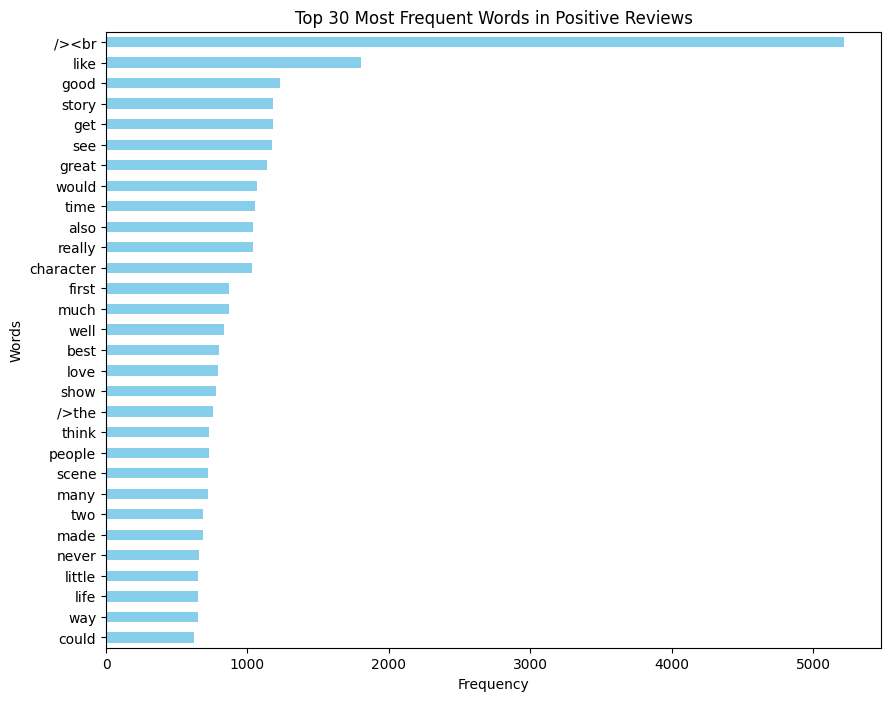

In [32]:
# Plotting
plt.figure(figsize=(10, 8))
positive_word_freq.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 Most Frequent Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

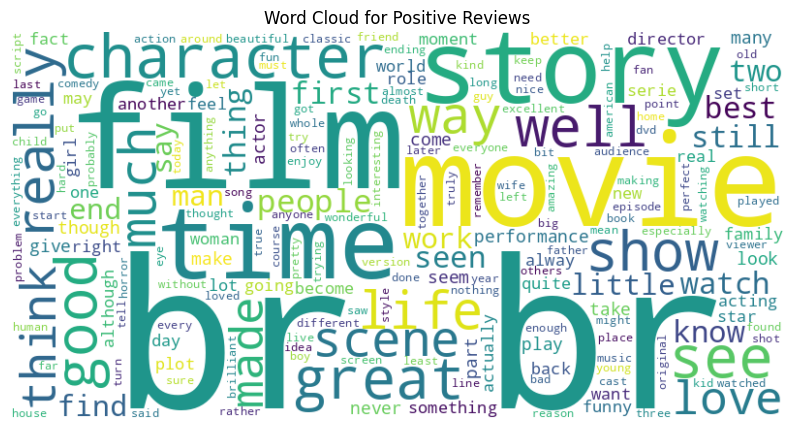

In [33]:
# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [34]:
# Importing CountVectorizer and create a sparse matrix of 2,500 tokens
vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(df['review_processed'])

In [35]:
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)


In [36]:
# Using GaussianNB to train the model on the training data
nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)

GaussianNB()

In [37]:
# accuracy of the model
nb_accuracy = nb_model.score(X_test.toarray(), y_test)
print(f'Naive Bayes Model Accuracy: {nb_accuracy:.2f}')


Naive Bayes Model Accuracy: 0.72


In [39]:
# Testing the model on the test set
y_pred = nb_model.predict(X_test.toarray())

In [41]:
# Creatimng the confusion matrix and classification report
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_matrix}')

Confusion Matrix:
[[394  85]
 [192 329]]


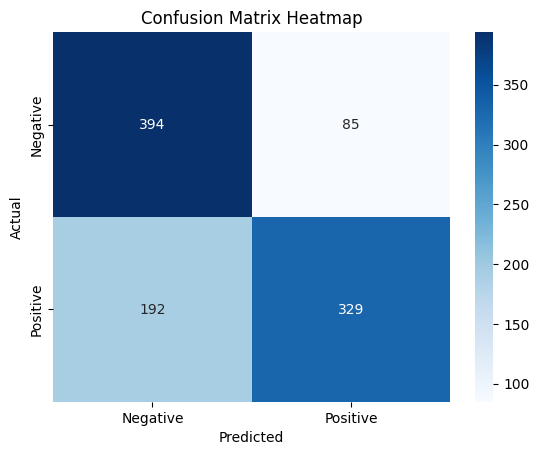

In [42]:
# Utilizing Seaborn heatmap to show TP, FP, TN, FN values
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
#  logistic regression model and check the accuracy of the model for C=0.01, 0.05, 0.5, 0.5, and 1
C_values = [0.01, 0.05, 0.1, 0.5, 1]
for C_value in C_values:
    lr_model = LogisticRegression(C=C_value, random_state=42)
    lr_model.fit(X_train, y_train)
    lr_accuracy = lr_model.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [51]:
print(f'Logistic Regression Model Accuracy (C={C_value}): {lr_accuracy:.2f}')


Logistic Regression Model Accuracy (C=1): 0.83


In [46]:
#  ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_model.predict_proba(X_test.toarray())[:, 1])
roc_auc = metrics.auc(fpr, tpr)


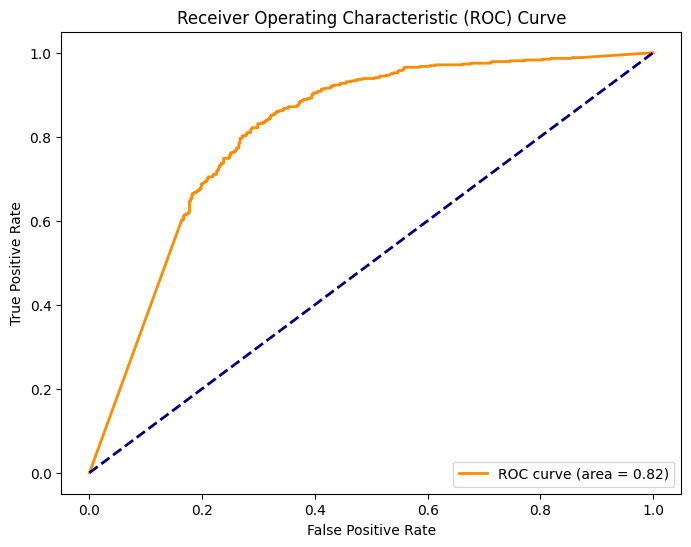

In [47]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Area under the curve
print(f'Area under the curve (AUC): {roc_auc:.2f}')

Area under the curve (AUC): 0.82
